# Банки — Анализ оттока клиентов

### Материалы
- Презентация - https://disk.yandex.ru/i/p_fsHIX6hCsiRA
- Дашборд - https://public.tableau.com/app/profile/.50292487/viz/-_16778280250670/Dashboard1

### Цель:

- Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

### Задачи:

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.
    
    *Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Проверим гипотезу различия кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.*

### Декомпозиция
- 1 Шаг. Изучение общей информации данных.
- 2 Шаг. Предобработка данных.
        2.1 Проверка корректности типов данных.
        2.2 Проверка на дубликаты.
        2.3 Проверка на пропуски.
- 3 Шаг. Исследовательский анализ.
        3.1 Визуализация признаков.
        3.2 Сравнение по признакам.
        3.3 Добавление столбцов для исследования.
        3.4 Матрица корреляции.
- 4 Шаг. Сегментация пользователя каждого города.
- 5 Шаг. Проверка статистических гипотез.
- 6 Шаг. Выводы. Рекомендации.

## 1 Шаг. Изучение общей информации данных.

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — приблизительная оценка собственности клиента,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта (0 - нет, 1 - есть),
- `last_activity` — активный клиент (0 - не активный, 1 - активный),
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет (0 - остался, 1 - ушёл).

In [1]:
# установка библиотек
!pip install bokeh
!pip install folium
!pip install psycopg2
!pip install plotly

In [2]:
# Импортирт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats as st
import math as mth

In [3]:
# Загружаем данные и смотрим основную информацию о датафрейме
pd.set_option('display.max_colwidth', None)
#data_old = pd.read_csv('C:/проект выпускной/bank_dataset.csv') #bank_scrooge.csv
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
data = pd.read_csv(path)
display(data.head())
display(data.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


None

Данные состоят из 10000 строк записей, в которых имеются пропуски в столбце "balance". Типы данных соответствуют  показателям. Необходимо привести названия столбцов к нижнему регистру.

## 2 Шаг. Предобработка данных.

In [4]:
# Проверяем на дубликаты 
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 1


In [5]:
#найдем строку с дубликатом
dupl_rows = data[data.duplicated(keep='last')]
dupl_rows1 = data[data.duplicated()]
#просмотр повторяющихся строк
display(dupl_rows)
display(dupl_rows1)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
4343,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9457,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0


Выявлено две строки с идентичными данными. Смотрим дальше.

In [6]:
# Проверяем на дубликаты 
print('Количество дубликатов в столбце "USERID" :', data['USERID'].duplicated().sum())

Количество дубликатов в столбце "USERID" : 73


Посмотрим на эти данные.

In [7]:
#найдем строку с дубликатом
dupl_userid = data[data['USERID'].duplicated(keep='last')].sort_values(by ='USERID', ascending = 0)
dupl_userid1 = data[data['USERID'].duplicated()].sort_values(by ='USERID', ascending = 0)
#просмотр повторяющихся строк
display(dupl_userid)
display(dupl_userid1)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1247,228075,932.0,Ярославль,М,45,5,7601719.20,2,1,1,408121.16,0
8205,227795,840.0,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1
2597,226719,990.0,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
6412,226550,939.0,Ярославль,М,34,0,NaN,1,1,1,145913.73,0
6446,222480,776.0,Ярославль,Ж,38,5,823145.83,2,1,1,55777.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
1411,123461,829.0,Рыбинск,Ж,59,0,96222.44,2,0,1,102771.55,1
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
6457,228075,839.0,Ярославль,М,39,5,507199.85,3,0,1,85195.80,0
8497,227795,839.0,Рыбинск,М,34,2,326593.14,2,1,0,103314.92,0
4216,226719,903.0,Ярославль,Ж,63,0,NaN,1,1,0,138582.58,0
8070,226550,940.0,Ярославль,М,34,0,NaN,1,0,1,147696.95,0
9104,222480,776.0,Ярославль,Ж,38,5,796735.09,1,1,1,55073.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0


Данные с дублирующими userid имеют разные даннные и так как их менее 1% - удалим дубли.

In [8]:
data = data.drop_duplicates(subset=['USERID']).reset_index(drop=True)

In [9]:
# Приводим к нижнему регистру название столбцов
data.columns = data.columns.str.lower()

Дубликаты найдены и убраны и строк теперь - 9926.

#### Посмотрим рапределение по признакам

<AxesSubplot:>

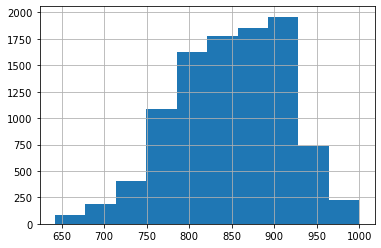

In [10]:
# баллы кредитного скоринга
data['score'].hist()  
#.describe()

Баллы кредитного скоринга распределены нормально

In [11]:
# город
data['city'].value_counts()

Ярославль    5864
Рыбинск      2642
Ростов       1421
Name: city, dtype: int64

Больше всего клиентов из Ярославля - 5864, меньше всего их в Ростове - 1421.

In [12]:
# пол
data['gender'].value_counts()

М    4973
Ж    4954
Name: gender, dtype: int64

По гендерному признаку данные распределены равномерно.

In [13]:
# возраст
display(data['age'].describe())

count    9927.000000
mean       42.833081
std        12.126052
min        18.000000
25%        34.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

В среднем, клиенты банка в возрасте 40 лет. В основном клиенты банка от 34 до 51 года. Минимальный возраст - 18, а самый максимальный - 86 лет. Есть выбросы - клиенты, которые старше 75 лет.

count    9927.000000
mean        2.634633
std         1.979286
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64

0    2554
5    1911
4    1841
3    1533
2    1046
1     772
6     161
7      79
8      17
9      13
Name: equity, dtype: int64

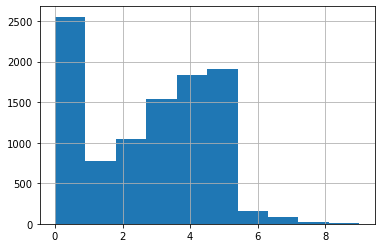

In [14]:
# оценка собственности
data['equity'].hist()  
display(data['equity'].describe())
display(data['equity'].value_counts())

Средняя оценка собственности: 3, почти одинаковое количество клиентов имеющих оценку 2,3,4,5. А вот при 0 оценке - больше всего количество пользователей.

count         7667.0
mean        828902.0
std        1985272.0
min              0.0
25%         295261.0
50%         524894.0
75%         980801.0
max      119113552.0
Name: balance, dtype: float64

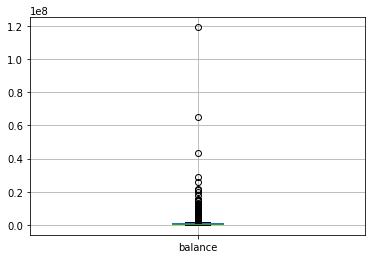

In [15]:
data.boxplot(['balance'])
display(data['balance'].describe().round())
#data['balance'].hist()

Минимальный баланс - 0, максимальный - более 100млн. Средний - 640т. 

In [16]:
# количество продуктов, которыми пользуется клиент
data['products'].value_counts()

2    5081
1    3306
3    1035
4     474
5      30
0       1
Name: products, dtype: int64

В большинстве данных у половины клиентов есть 2 продукта банка, более 4 продуктов занимает 5%. Есть один клиент который ни имеет не одного продукта - взглянем на данные.

In [17]:
data[data['products']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8905,147837,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Клиент, не имеющий продуктов банка - из Рыбинска в возрасте 79 лет не активен - ушел из банка. Уберем эти данные для дальнейшего анализа.

In [18]:
data = data[data['products']!=0]

In [19]:
# кредитная карта
data['credit_card'].value_counts(normalize=True)

1    0.679931
0    0.320069
Name: credit_card, dtype: float64

Клиентов с кредитной картой - 68% , у остальных 32% их нет.

In [20]:
# активность
data['last_activity'].value_counts(normalize=True)

1    0.523574
0    0.476426
Name: last_activity, dtype: float64

Больше половины клиентов банка (52%) находятся в активном статусе. Нужно в дальнейшем провести анализ по данному признаку.

In [21]:
# заработная плата клиента
data['est_salary'].describe().round()

count       9926.0
mean      147904.0
std       139367.0
min         2546.0
25%        75252.0
50%       119715.0
75%       174680.0
max      1395064.0
Name: est_salary, dtype: float64

Заработная плата клиента заполнена в некоторых данных с помощью модели банка, которая выводит сумму в зависимости от показаний, тк клиенты не все указывают свою зарплату. Средние доходы равны примерно 147 000. Минимальные 2 546. А максимально - более 1 395 000.

In [22]:
# отточность
data['churn'].value_counts(normalize=True)

0    0.816643
1    0.183357
Name: churn, dtype: float64

Отток клиентов свыше 18%. 

#### Посмотрим на пропуски и на их признаки

In [23]:
print('Количество пропусков:')
data.isnull().sum()

Количество пропусков:


userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2259
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

В столбце с балансом есть пропуски скорее всего это нулевой баланс. Проверим есть ли уже в базе клиенты с таким балансом.

In [24]:
data.query('balance == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3890,179831,730.0,Ярославль,М,18,0,0.0,2,1,1,64548.33,0
6730,148456,813.0,Ярославль,М,20,2,0.0,2,1,0,23876.51,0


При нулевом балансе - данные есть, значит нужно посмотреть характер пропусков по некоторым признакам.

In [25]:
print('Нулевой баланс по признаку города:')
display(data[(data['balance'].isna())]['city'].value_counts())

print('Нулевой баланс по признаку пола:') 
display(data[(data['balance'].isna())]['gender'].value_counts())

print('Нулевой баланс по признаку активности:') 
display(data[(data['balance'].isna())]['last_activity'].value_counts())

print('Нулевой баланс по признаку наличия кредитной карты:') 
display(data[(data['balance'].isna())]['credit_card'].value_counts(normalize=True))

Нулевой баланс по признаку города:


Ярославль    1454
Рыбинск       569
Ростов        236
Name: city, dtype: int64

Нулевой баланс по признаку пола:


М    1263
Ж     996
Name: gender, dtype: int64

Нулевой баланс по признаку активности:


1    1241
0    1018
Name: last_activity, dtype: int64

Нулевой баланс по признаку наличия кредитной карты:


1    0.815848
0    0.184152
Name: credit_card, dtype: float64

 Распределение клиентов с нулевым балансом не отличается сильно от данных по всей таблице, единственное что тех, у кого кредитная карта -больше, чем тех у кого её нет. Поэтому, для дальнейшего исследования пропуски следует заменит на 0 значение.

In [26]:
# пропуски заменим на 0
data['balance'] = data['balance'].fillna(0)

In [27]:
# проверка на дубликаты и пропуски
print('Количество дубликатов:', data.duplicated().sum())
print('Количие пропусков:')
data.isnull().sum()

Количество дубликатов: 0
Количие пропусков:


userid           0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

### Вывод:
- Данные состоят из 10000 строк записей, пропуски в столбце "balance" заменены на значение 0. Типы данных соответствуют  показателям. Приведены названия столбцов к нижнему регистру.\
- Дубликаты найдены и убраны и строк стало - 9926.\
- Больше всего клиентов из Ярославля - 5864, меньше всего их в Ростове - 1421.\
- Количество мужчин и женщин практически одинаково.\
- Средняя оценка собственности: 3, почти одинаковое количество клиентов имеющих оценку 2,3,4,5. Больше всего количество пользователей с оценкой 0.\
- Баллы кредитного скоринга распределены нормально\
- В среднем, клиенты банка в возрасте 42 лет. В большем количестве клиенты в 32-38 лет. Минимальный возраст - 18, а самый максимальный - 86 лет.\
- Минимальный баланс - 0, максимальный - более 100млн. Средний - 640т.\
- В большинстве данных у половины клиентов есть 2 продукта банка, более 4 продуктов занимает 5%.\
- Клиентов с кредитной картой - 68% , у остальных 32% их нет.
- 52% клиентов банка находятся в активном статусе.\
- Средние доходы равны примерно 147 000. Минимальные 2 546. А максимально - более 1 395 000.\
- Отток клиентов свыше 18%.

## 3 Шаг. Исследовательский анализ.

#### Анализ распределений признаков 

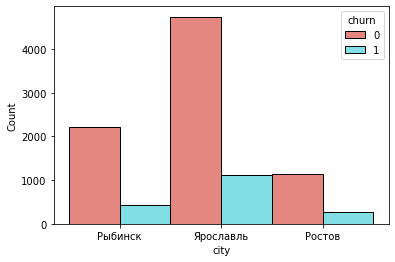

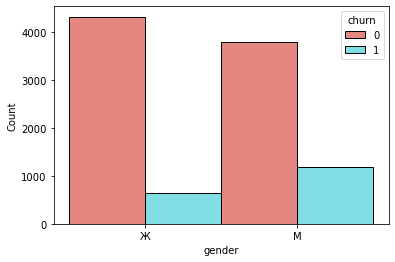

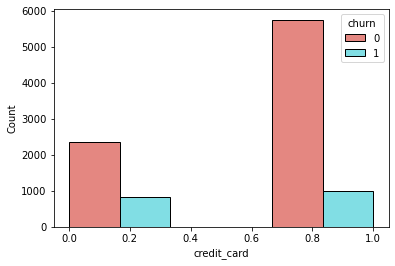

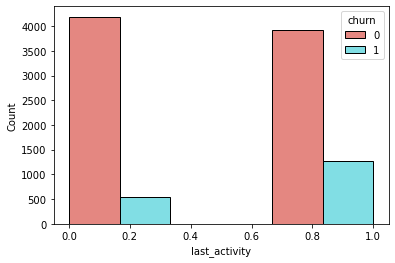

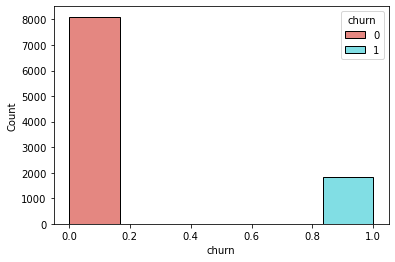

In [28]:
# рассмотрим некоторые признаки с помощью графиков
for index in data.drop(columns=['userid', 'balance', 'est_salary', 'products', 'age','score', 'equity']).columns:
    sns.histplot(x=index, hue="churn", data=data,  multiple="dodge", bins=3, palette='hls')
    plt.show();

Не возможно точно определить на данном этапе каких клиентов больше ушло - т.к есть разница между начальными данными по городам, по полу и др. Рассмотрим более подробнее каждый признак.

#### Рассмотрим отток по городу

In [29]:
# сгруппируем данные по городам
city = data.groupby('city').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()
# сгруппируем отточных клиентов
city_churn1 = data.query('churn == 1')\
                  .groupby('city')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()
# объединим две таблицы для расчета процента оттока от общего кол-ва  для каждой группы
city_churn = city.merge(city_churn1, left_on='city', right_on='city')
city_churn['%'] = 100*(city_churn['userid_y'] / city_churn['userid_x']).round(3)
city_churn

,city,userid_x,userid_y,%
0,Ярославль,5864,1121,19.1
1,Рыбинск,2641,430,16.3
2,Ростов,1421,269,18.9


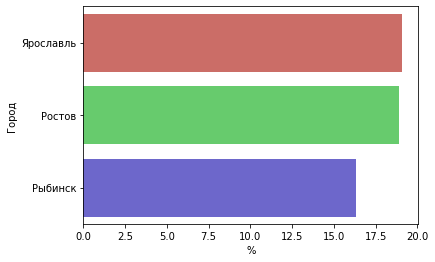

In [216]:
city_churn = city_churn.sort_values('%', ascending=False)
sns.barplot(data=city_churn, x='%', y='city', palette='hls')
plt.ylabel('Город');

Большой отток клиентов с Ярославля -19% и с Ростова с разницей в 0,2%.

#### Рассмотрим отток по полу

In [31]:
# сгруппируем данные по полу
gender = data.groupby('gender').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()
# сгруппируем отточных клиентов
gender_churn1 = data.query('churn == 1')\
                  .groupby('gender')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()
# объединим две таблицы для расчета процента оттока от общего кол-ва  для каждой группы
gender_churn = gender.merge(gender_churn1, left_on='gender', right_on='gender')
gender_churn['%'] = 100*(gender_churn['userid_y'] / gender_churn['userid_x']).round(3)
gender_churn

,gender,userid_x,userid_y,%
0,М,4973,1183,23.8
1,Ж,4953,637,12.9


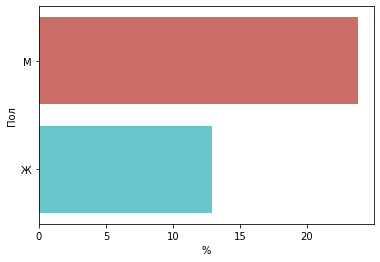

In [215]:
gender_churn = gender_churn.sort_values('%', ascending=False)
sns.barplot(data=gender_churn, x='%', y='gender', palette='hls')
plt.ylabel('Пол');

Мужчин уходит больше чем женщин. 24% оттока среди мужчин

#### Рассмотрим отток по наличию кредитной карты

In [33]:
# сгруппируем данные по наличию кредитки
credit_card = data.groupby('credit_card').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()
# сгруппируем отточных клиентов
credit_card_churn1 = data.query('churn == 1')\
                  .groupby('credit_card')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()
# объединим две таблицы для расчета процента оттока от общего кол-ва  для каждой группы
credit_card_churn = credit_card.merge(credit_card_churn1, left_on='credit_card', right_on='credit_card')
credit_card_churn
credit_card_churn['%'] = 100*(credit_card_churn['userid_y'] / credit_card_churn['userid_x']).round(3)
credit_card_churn

,credit_card,userid_x,userid_y,%
0,1,6749,1003,14.9
1,0,3177,817,25.7


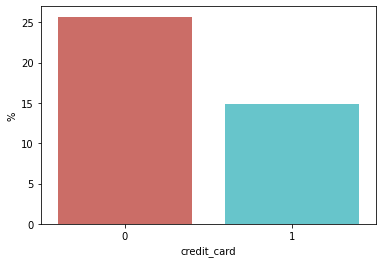

In [34]:
sns.barplot(data=credit_card_churn, x='credit_card', y='%', palette='hls');

Отток клиентов без кредитки больше - 26%, чем с кредитной картой - 15%.

#### Рассмотрим отток по активности клиента 

In [35]:
# сгруппируем данные по активности клиента
last_activity = data.groupby('last_activity').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()
# сгруппируем отточных клиентов
last_activity_churn1 = data.query('churn == 1')\
                  .groupby('last_activity')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()
# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
last_activity_churn = last_activity.merge(last_activity_churn1, left_on='last_activity', right_on='last_activity')
last_activity_churn['%'] = 100*(last_activity_churn['userid_y'] / last_activity_churn['userid_x']).round(3)
last_activity_churn

,last_activity,userid_x,userid_y,%
0,1,5197,1279,24.6
1,0,4729,541,11.4


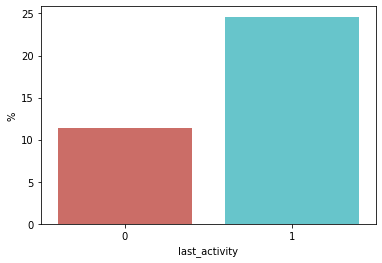

In [36]:
sns.barplot(data=last_activity_churn, x='last_activity', y='%', palette='hls');

Чаще покидают банк активные клиенты - 25% от всех активных

#### Рассмотрим отток по возрасту

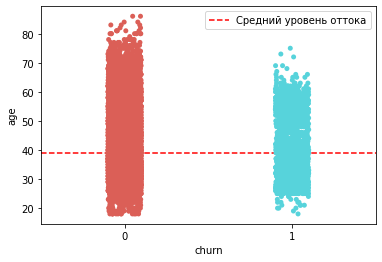

In [227]:
sns.stripplot(x='churn', y='age', data=data, palette='hls')
plt.axhline(y=data.query('churn == 1')['age'].median(), color='red', linestyle='--', label='Cредний уровень оттока')
plt.legend();

Количество уходящих в большем количестве тех, кто в возрасте от 25 до 60 лет. Создадим категории по возрасту чтобы выбрать интервал который больше уходит с банка.

In [38]:
# создам копию базы для исследования и добавления столбца.
data_1 = data.copy() 
pd.set_option('display.max_columns', None)

In [39]:
# создам функцию для категорий по возрасту
def categorize_age(income):
    try:
        if income <= 25:
            return 'до 25'
        elif 25 < income <= 35:
            return 'от 25 до 35'
        elif 35 < income <= 45:
            return 'от 35 до 45'
        elif 45 < income <= 55:
            return 'от 45 до 55'
        elif 55 < income <= 65:
            return 'от 55 до 65'
        elif 65 < income :
            return 'от 65'
    except:
        pass
data_1['age_category'] = data_1['age'].apply(categorize_age)
data_1

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,до 25
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,от 35 до 45
2,120722,892.0,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,от 25 до 35
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,от 45 до 55
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,от 25 до 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,от 25 до 35
9923,139170,894.0,Ярославль,М,46,0,0.00,1,1,0,196898.29,0,от 45 до 55
9924,115639,903.0,Ярославль,М,24,0,0.00,2,1,1,108905.09,0,до 25
9925,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,от 65


In [40]:
# сгруппируем данные по возрасту
age_category = data_1.groupby('age_category').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
age_category_churn1 = data_1.query('churn == 1')\
                  .groupby('age_category')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
age_category_churn = age_category.merge(age_category_churn1, left_on='age_category', right_on='age_category')
age_category_churn['%'] = 100*(age_category_churn['userid_y'] / age_category_churn['userid_x']).round(3)
age_category_churn = age_category_churn.sort_values(by='%', ascending=False)
age_category_churn 

,age_category,userid_x,userid_y,%
1,от 25 до 35,2942,642,21.8
2,от 45 до 55,1709,370,21.7
3,от 55 до 65,1315,259,19.7
5,до 25,303,51,16.8
0,от 35 до 45,3171,488,15.4
4,от 65,486,10,2.1


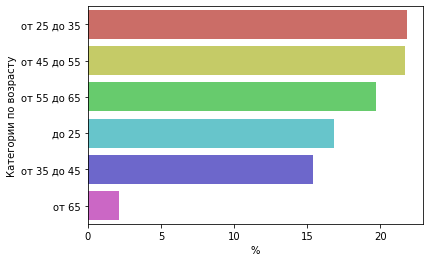

In [214]:
# построю график
sns.barplot(data=age_category_churn, x='%', y='age_category', palette='hls')
plt.ylabel('Категории по возрасту');

Клиенты от 25 до 35 и от 45 до 55 лет уходят больше всего чем остальные - 22% у каждой из групп. Клиенты от 65 самые преданные банку и остаются там - всего 2% оттока. 

#### Рассмотрим отток по количеству продуктов, которыми пользуется клиент

In [42]:
# сгруппируем данные по количеству продуктов
products = data_1.groupby('products').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
products_churn1 = data_1.query('churn == 1')\
                  .groupby('products')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
products_churn = products.merge(products_churn1, left_on='products', right_on='products')
products_churn['%'] = 100*(products_churn['userid_y'] / products_churn['userid_x']).round(3)
products_churn = products_churn.sort_values(by='%', ascending=False)
products_churn

,products,userid_x,userid_y,%
3,4,474,300,63.3
4,5,30,9,30.0
2,3,1035,298,28.8
0,2,5081,978,19.2
1,1,3306,235,7.1


Максимальный отток - клиенты у которых 4 продукта уходят - 63%. Минимальный отток - клиенты с 1 продуктом  - всего 7% оттока.

#### Рассмотрим отток по оценке собственности клиента

In [43]:
# сгруппируем данные по оценке собственности
equity = data_1.groupby('equity').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
equity_churn1 = data_1.query('churn == 1')\
                  .groupby('equity')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
equity_churn = equity.merge(equity_churn1, left_on='equity', right_on='equity')
equity_churn['%'] = 100*(equity_churn['userid_y'] / equity_churn['userid_x']).round(3)
equity_churn = equity_churn.sort_values(by='%', ascending=False)
equity_churn 

,equity,userid_x,userid_y,%
9,9,13,7,53.8
7,7,79,37,46.8
6,6,161,58,36.0
8,8,17,6,35.3
1,5,1911,577,30.2
2,4,1841,465,25.3
3,3,1532,321,21.0
4,2,1046,166,15.9
5,1,772,93,12.0
0,0,2554,90,3.5


Самый большой отток клиентов по оценке собственности равной 9 - 54% и с оценкой 7 - 47%.\
Самый низкий отток 4% - это клиенты с 0 оценкой недвижимости и таких клиентов больше всего (26% от вех).

#### Рассмотрим отток по баллам кредитного скоринга

In [44]:
# создам функцию для категорий по баллам кредитного скоринга
def categorize_score(income):
    try:
        if income <= 765:
            return 'плохой'
        elif 766 < income <= 895:
            return 'средний'
        elif 896 < income <= 950:
            return 'хороший'  
        elif 951 < income:
            return 'очень хороший'
    except:
        pass
data_1['score_category'] = data_1['score'].apply(categorize_score)

In [46]:
data_1['score_category'].value_counts()

средний          6138
хороший          2265
плохой           1012
очень хороший     395
Name: score_category, dtype: int64

In [48]:
# сгруппируем данные по баллам кредитного скоринга
score = data_1.groupby('score_category').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
score_churn1 = data_1.query('churn == 1')\
                  .groupby('score_category')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
score_churn = score.merge(score_churn1, left_on='score_category', right_on='score_category')
score_churn['%'] = 100*(score_churn['userid_y'] / score_churn['userid_x']).round(3)
score_churn = score_churn.sort_values(by='%', ascending=False)
score_churn 

,score_category,userid_x,userid_y,%
0,средний,6138,1269,20.7
1,хороший,2265,422,18.6
3,очень хороший,395,53,13.4
2,плохой,1012,47,4.6


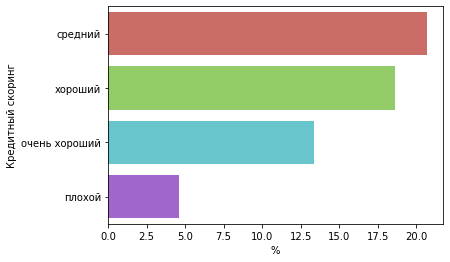

In [49]:
# построю график
sns.barplot(data=score_churn, x='%', y='score_category', palette='hls')
plt.ylabel('Кредитный скоринг');

Клиенты со средним баллом кредитного скоринга уходят из банка больше - 21%. Самый низкий отток у плохого показателя по баллам - 5%.

#### Рассмотрим отток по балансу клиента

In [50]:
data['balance'].describe().round()

count         9926.0
mean        640257.0
std        1779053.0
min              0.0
25%          63958.0
50%         376563.0
75%         805331.0
max      119113552.0
Name: balance, dtype: float64

In [51]:
# создам функцию для категорий по балансу клиента
def categorize_balance(income):
    try:
        if income <= 10000:
            return 'менее 10 тр'
        elif 10001 < income <= 50000:
            return 'от 10 до 50 тр'
        elif 50001 < income <= 100000:
            return 'от 50 до 100 тр'    
        elif 100001 < income <= 200000:
            return 'от 100 до 200 тр' 
        elif 200001 < income <= 400000:
            return 'от 200 до 400 тр' 
        elif 400001 < income:
            return 'более 400 тр'   
    except:
        pass
data_1['balance_category'] = data_1['balance'].apply(categorize_balance)

In [53]:
# сгруппируем данные по балансу клиента
balance = data_1.groupby('balance_category').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
balance_churn1 = data_1.query('churn == 1')\
                  .groupby('balance_category')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
balance_churn = balance.merge(balance_churn1, left_on='balance_category', right_on='balance_category')
balance_churn['%'] = 100*(balance_churn['userid_y'] / balance_churn['userid_x']).round(3)
balance_churn = balance_churn.sort_values(by='%', ascending=False)
balance_churn 

,balance_category,userid_x,userid_y,%
0,более 400 тр,4763,1334,28.0
5,от 10 до 50 тр,110,25,22.7
2,от 200 до 400 тр,1830,305,16.7
3,от 100 до 200 тр,690,111,16.1
4,от 50 до 100 тр,220,27,12.3
1,менее 10 тр,2313,18,0.8


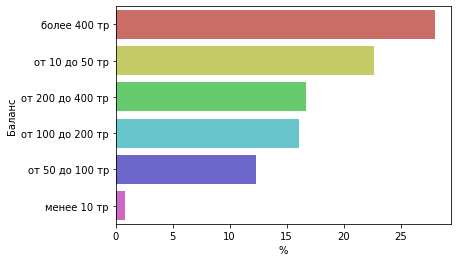

In [54]:
# построение графика
sns.barplot(data=balance_churn, x='%', y='balance_category', palette='hls')
plt.ylabel('Баланс');

Больше всего уходят клиенты с балансом более 400тр. - большая часть клиентов банка (4763 человека) - 28%. Вторая категория по численности (2313 клиента) - с балансом менее 10тр и отток у них менее 1%.

#### Рассмотрим отток по заработной плате клиента

In [55]:
# создам функцию для категорий по заработной плате клиента
def categorize_est_salary(income):
    if income <= 50000:
        return 'низкий доход'
    elif income <= 100000:
        return 'средний доход'
    else:
        return 'высокий доход'
data_1['est_salary_category'] = data_1['est_salary'].apply(categorize_est_salary)
data_1

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_category,score_category,balance_category,est_salary_category
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,до 25,средний,от 50 до 100 тр,средний доход
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,от 35 до 45,средний,более 400 тр,средний доход
2,120722,892.0,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,от 25 до 35,средний,менее 10 тр,высокий доход
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,от 45 до 55,средний,более 400 тр,высокий доход
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,от 25 до 35,плохой,менее 10 тр,средний доход
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,от 25 до 35,средний,от 50 до 100 тр,низкий доход
9923,139170,894.0,Ярославль,М,46,0,0.00,1,1,0,196898.29,0,от 45 до 55,средний,менее 10 тр,высокий доход
9924,115639,903.0,Ярославль,М,24,0,0.00,2,1,1,108905.09,0,до 25,хороший,менее 10 тр,высокий доход
9925,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,от 65,средний,более 400 тр,средний доход


In [57]:
# сгруппируем данные по заработной плате клиента
est_salary = data_1.groupby('est_salary_category').agg({'userid':'count'}).sort_values(by='userid', ascending=False).reset_index()

# сгруппируем отточных клиентов
est_salary_churn1 = data_1.query('churn == 1')\
                  .groupby('est_salary_category')\
                  .agg({'userid':'count'})\
                  .sort_values(by='userid', ascending=False)\
                  .reset_index()

# объединим две таблицы для расчета процента оттока от общего кол-ва для каждой группы
est_salary_churn = est_salary.merge(est_salary_churn1, left_on='est_salary_category', right_on='est_salary_category')
est_salary_churn['%'] = 100*(est_salary_churn['userid_y'] / est_salary_churn['userid_x']).round(3)
est_salary_churn = est_salary_churn.sort_values(by='%', ascending=False)
est_salary_churn 

,est_salary_category,userid_x,userid_y,%
0,высокий доход,6022,1195,19.8
1,средний доход,2712,451,16.6
2,низкий доход,1192,174,14.6


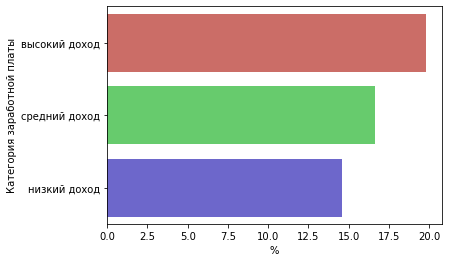

In [58]:
# построю график
sns.barplot(data=est_salary_churn, x='%', y='est_salary_category', palette='hls') 
plt.ylabel('Категория заработной платы');

Максимальный отток у клиентов с высоким доходом (большая часть клиентов банка - 6022 человека) - 20%. Процент ухода клиентов с минимальным доходом - 15%

#### Матрица корреляции

Создадим столбцы для построения корреляции в дальнейшем. Из данных о городе и о поле клиента добавим дополнительные столбцы с  бинарными данными для каждого признака.

In [59]:
# копирую столбец с городом что бы остаивть общую информацию в датасете 
data_1['city1'] = data_1['city'].copy()
data_1 = pd.get_dummies(data_1, columns=['city'], drop_first= False )

In [60]:
# копирую столбец с полом что бы остаивть общую информацию в датасете 
data_1['gender1'] = data_1['gender'].copy()
data_1 = pd.get_dummies(data_1, columns=['gender'], drop_first= False )
data_1.sample(10)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,score_category,balance_category,est_salary_category,city1,city_Ростов,city_Рыбинск,city_Ярославль,gender1,gender_Ж,gender_М
3990,214425,893.0,50,0,0.00,1,1,0,181082.83,0,...,средний,менее 10 тр,высокий доход,Ярославль,0,0,1,Ж,1,0
3347,195785,908.0,38,4,1450392.90,2,1,1,105294.37,0,...,хороший,более 400 тр,высокий доход,Рыбинск,0,1,0,М,0,1
9509,178742,806.0,33,4,380401.33,2,1,0,121230.38,0,...,средний,от 200 до 400 тр,высокий доход,Ярославль,0,0,1,Ж,1,0
5178,165475,910.0,39,4,1856031.16,1,1,1,134467.32,0,...,хороший,более 400 тр,высокий доход,Рыбинск,0,1,0,М,0,1
2640,126478,884.0,57,0,0.00,2,1,1,97198.09,0,...,средний,менее 10 тр,средний доход,Рыбинск,0,1,0,Ж,1,0
1089,205741,849.0,63,5,652880.79,2,0,1,90334.21,0,...,средний,более 400 тр,средний доход,Ростов,1,0,0,Ж,1,0
8176,150795,949.0,33,4,1378133.39,1,1,1,189594.68,0,...,хороший,более 400 тр,высокий доход,Рыбинск,0,1,0,Ж,1,0
9172,116750,776.0,46,0,0.00,1,1,0,540423.84,1,...,средний,менее 10 тр,высокий доход,Ярославль,0,0,1,М,0,1
986,226747,878.0,37,5,1071062.78,2,0,1,167710.15,0,...,средний,более 400 тр,высокий доход,Рыбинск,0,1,0,Ж,1,0
320,212515,789.0,33,3,296676.19,2,1,0,64523.48,0,...,средний,от 200 до 400 тр,средний доход,Ярославль,0,0,1,М,0,1


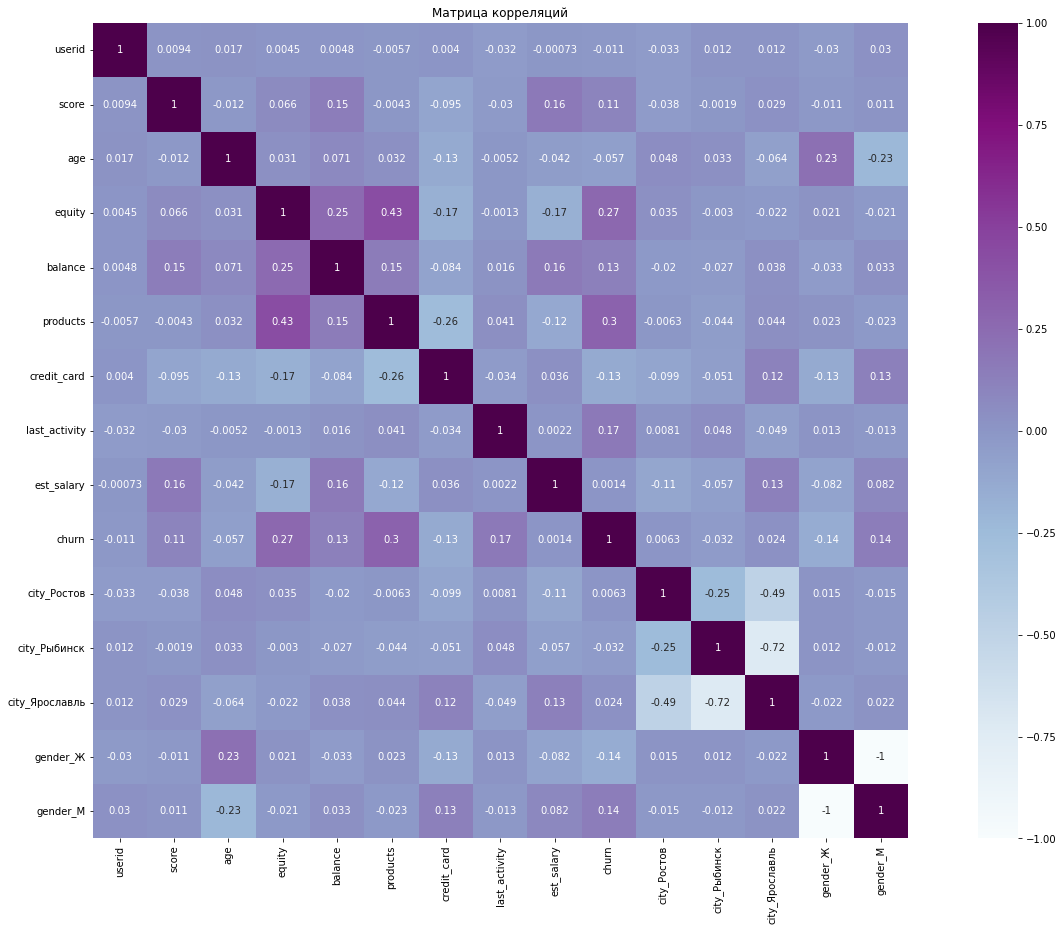

In [62]:
#построим матрицу корреляций
plt.figure(figsize=(25,15))
sns.heatmap(data = data_1.corr(), annot=True, square=True, cmap='BuPu')
plt.title('Матрица корреляций')
plt.show()

По матрице корреляции больший отток по продуктам и по приблизительной оценке собственности клиента - коэффициент корреляции по шкале Чеддока слабо положительный и равен 0,3.\
Следует рассмотреть показатели products и equity в сегменте с другим признаком.

### Вывод:

- Больший отток клиентов с Ярославля -19% и с Ростова с разницей в 0,2%.
- Мужчин уходит больше чем женщин - 24% оттока среди мужчин
- Отток клиентов без кредитки больше - 26%, чем с кредитной картой - 15%.
- Чаще покидают банк активные клиенты - 25% от всех активных
- Клиенты от 25 до 35 и от 45 до 55 лет уходят больше всего чем остальные - 22% оттока у каждой из групп. Клиенты от 65 - 2% оттока.
- Максимальный отток - клиенты у которых 4 продукта - 63%. Минимальный отток - клиенты с 1 продуктом  - всего 7%.
- Самый большой отток клиентов по оценке собственности равной 9 - 54% и с оценкой 7 - 47%. Самый низкий отток 4% - это клиенты с 0 оценкой недвижимости и таких клиентов больше всего (26% от вех).\
- Клиенты со средним баллом кредитного скоринга уходят из банка больше - 21%. Самый низкий отток у низкого показателя по баллам - 5%.
- Большая часть клиентов банка (4763 человека) с балансом более 400тр. больше всего уходят - 28%. Вторая категория по численности (2313 клиента) - с балансом менее 10тр и отток у них менее 1%.
- Большая часть клиентов банка (6022 человека) с высоким доходом имеют максимальный отток - 20%. Процент ухода клиентов с минимальным доходом - 15%.
- По матрице корреляции больший отток по продуктам и по оценке собственности клиента - коэффициент корреляции по шкале Чеддока слабо положительный и равен 0,3.

## Шаг. Сегментация пользователя каждого города.

##### Сгруппирую данные по трём признакам отточности в сегмент: женщины, с балансом более 400тр., без кредитной карты:

In [212]:
segment_1 = data_1.query('gender1 == "М" & balance_category == "более 400 тр" & balance_category == "более 400 тр" & credit_card == 0')
print(f'Общее число клиентов -', segment_1['userid'].count())
print('Процент отточных клиентов - {:.0%}'.format((segment_1.query('churn == 1')['userid'].count())/ (segment_1['userid'].count()))) 

Общее число клиентов - 804
Процент отточных клиентов - 49%


Отток среди женщин, с балансом более 400тр., без кредитной карты составил 49%(около 400человек) - Следует порекомендовать банку предложить услуги кредитных карт или накопительных счетов, тк почти каждый второй в этой категории покидает банк.

##### Сгруппирую данные по трём признакам отточности в сегмент: Клиенты от 25 до 35 и от 45 до 55 с высоким доходом:

In [224]:
segment_2 = data_1.query('(age_category == "от 25 до 35" | age_category == "от 45 до 55") & est_salary_category == "высокий доход" ')
print(f'Общее число клиентов -', segment_2['userid'].count())
print('Процент отточных клиентов - {:.0%}'.format((segment_2.query('churn == 1')['userid'].count())/ (segment_2['userid'].count()))) 

Общее число клиентов - 2747
Процент отточных клиентов - 24%


Отток среди клиентов в возрасте 25-35 и 45-55 с высоким доходом - 24% (около 700 человек). Рекомендуется пропаботать программу удержания данных котегорий клиентов с доходом выше 400т.р, возможно это накопительные вклады.

## Шаг. Портреты пользователя каждого города.

#### Выявим отточность клиентов в зависимости от оценки недвижимости:

In [63]:
equity_pivot = data_1.pivot_table(index = 'city1', values = 'churn', aggfunc = 'mean', columns='equity')\
                     .sort_values(by = 'city1', ascending=False)\
                     .round(2) #.reset_index()

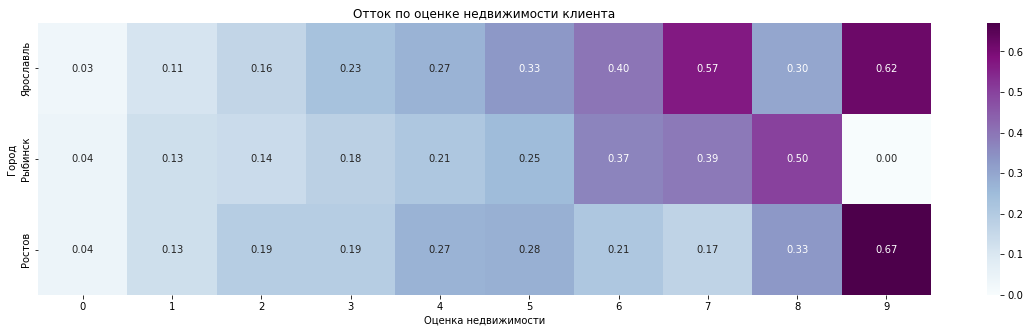

In [64]:
plt.figure(figsize=(20, 5))
sns.heatmap(equity_pivot, cmap='BuPu', annot=True, fmt='.2f')
plt.title('Отток по оценке недвижимости клиента')
plt.xlabel('Оценка недвижимости') 
plt.ylabel('Город')
plt.show()

Для города Ростов выявлена большая отточность клиентов с наивысшей оценкой недвижимости - 9.\
Для города Ярославль - оценка 7 и 9 выявили наибольший отток клиентов.\
Для города Рыбинск больший отток клиентов с оценкой 5.

#### Выявим отточность клиентов в зависимости от количества продуктов:

In [66]:
products_pivot = data_1.pivot_table(index = 'city1', values = 'churn', aggfunc = 'mean', columns='products')\
                       .sort_values(by = 'city1', ascending=False)\
                       .round(2)

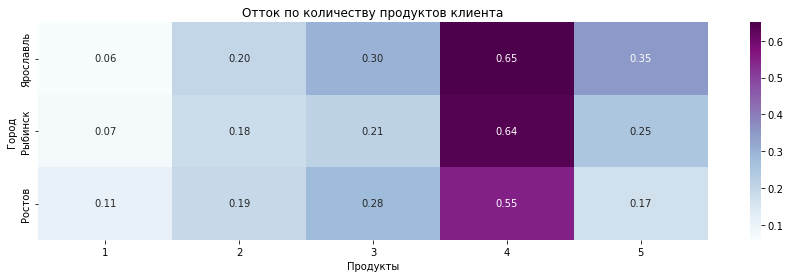

In [67]:
plt.figure(figsize=(15, 4))
sns.heatmap(products_pivot, cmap='BuPu', annot=True, fmt='.2f')
plt.title('Отток по количеству продуктов клиента')
plt.xlabel('Продукты') 
plt.ylabel('Город')
plt.show()

Для всех городов выявлена большая отточность среди клиентов с количеством продуктов - 4.

In [68]:
last_activity_pivot = data_1.pivot_table(index = 'city1', values = 'churn', aggfunc = 'mean', columns='last_activity')\
                       .sort_values(by = 'city1', ascending=False)\
                       .round(2)

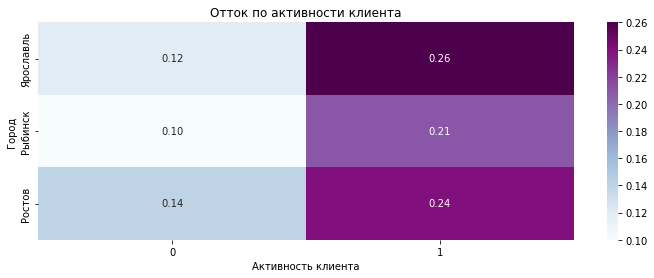

In [69]:

plt.figure(figsize=(12, 4))
sns.heatmap(last_activity_pivot, cmap='BuPu', annot=True, fmt='.2f')
plt.title('Отток по активности клиента')
plt.xlabel('Активность клиента') 
plt.ylabel('Город')
plt.show()

Действительно, у всех городов выражено что чем активнее пользователь тем больше вероятность что он перестанет пользоваться банком. Наибольший отток у клиентов из Ярославля

### Вывод:
- В Ростове больше чем в других городах отток клиентов по признакам: с оценкой недвижимости равной 9 и количеством продуктов - 4
- В Ярославле - с оценкой недвижимости равной 7 и 9 и низким оттоком, чем в других городах по признаку количество продуктов - 4
- Рыбинск - низкий отток по сравнению с другими городами по признакам: с оценкой недвижимости равной 5 и количеством продуктов - 4
- Чем больше количество продуктов, больше собственности и если клиент активный - тем больше клиенты уходят в отток. 

## Шаг. Проверка статистических гипотез.

#### Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

*Проверка распределения на нормальность.*

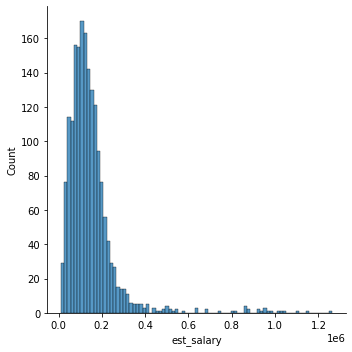

In [70]:
# создадим срез данных по отточным клентам
data_churn1 = data.query('churn == 1')
# посмотрим распределение на нормальность
sns.displot(data_churn1['est_salary']);

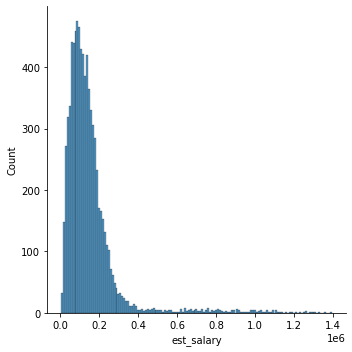

In [71]:
# создадим срез данных по клентам которые остались
data_churn0 = data.query('churn == 0')
# посмотрим распределение на нормальность 
sns.displot(data_churn0['est_salary'])

Для исследования используем Непараметрический тест Уилкоксона-Манна-Уитни - т.к. данные в двух группах(churn=1 и churn=0) распределены не равномерно и имеют выбросы.

#### Сформулируем гипотезы:
- Нулевая гипотеза: Есть статистически значимая разница доходов между теми клиентами, которые ушли и теми, которые остались.

- Альтернативная гипотеза: Нет статистически значимой разницы доходов между теми клиентами, которые ушли и теми, которые остались.

Задам уровень значимости: alpha = 0.05

In [72]:
data_churn1 = data.query('churn == 1')
data_churn0 = data.query('churn == 0')
alpha = 0.05  # критический уровень статистической значимости

results =st.mannwhitneyu(data_churn0['est_salary'],data_churn1['est_salary'], True, 'less')
print('P-value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.00011
Отвергаем нулевую гипотезу: разница статистически значима


#### Вывод:
Нет существенной разницы между доходами ушедших  клиентов и тех кто остался. 

#### Проверим гипотезу различия кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

*Проверка распределения на нормальность.*

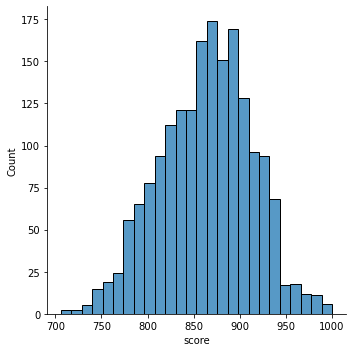

In [73]:
# посмотрим распределение на нормальность отточных клиентов
sns.displot(data_churn1['score']);

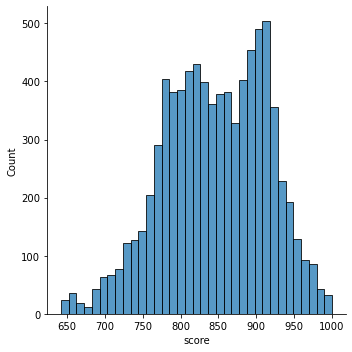

In [74]:
# посмотрим распределение на нормальность клиентов которые остались
sns.displot(data_churn0['score'])

Для проверки  статистической значимости, применяю t-тест

#### Сформулируем гипотезы:
- Нулевая гипотеза: Есть статистически значимая разница баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

- Альтернативная гипотеза: Нет статистически значимой разницы баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

Задам уровень значимости: alpha=0.05

In [75]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_1samp(data_churn1['score'], data_churn0['score'].mean())
print('P-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value:  1.22951824108449e-50
Отвергаем нулевую гипотезу: разница статистически значима


In [ ]:
print(f'Средняя ЗП клиентов в оттоке -', estimated_salary_1.mean())
print(f'Средняя ЗП оставшихся клиентов -', df.query('churn == 0')['estimated_salary'].mean())

#### Вывод:
Нет статистически значимой разницы баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

# Выводы:
Перечислю признаки, которые больше чем остальные влияют на отток. Составлю отточный портрет. Это Клиенты:
- с Ярославля
- женщины
- без кредитной карты
- активность есть в течении 30 дней
- в возрасте от 25 до 35 и от 45 до 55
- имеют 4 продукта
- по оценке собственности равной 9
- со средним баллом кредитного скоринга
- с балансом более 400тр. и с высоким доходом


По городам:
- В Ростове больше чем в других городах отток клиентов по признакам: с оценкой недвижимости равной 9 и количеством продуктов - 4
- В Ярославле - с оценкой недвижимости равной 7 и 9 и низким оттоком, чем в других городах по признаку количество продуктов - 4
- Рыбинск - низкий отток по сравнению с другими городами по признакам: с оценкой недвижимости равной 5 и количеством продуктов - 4


*Чем больше количество продуктов, чем больше собственности и чем активнее клиент - тем больше банк теряет их как своих клиентов*

# Рекомендации:
- Проанализировать причины оттока клиентов с города Ярославль
- Предлагать кредитные карт текущим клиентам, больше рассказывать об возможностях этого продукта и удобства использования, например.
- Создать интересные продукты для категории клиентов в возрасте 25-35 - например ипотеку
- Следить за тем, что бы клиент был не перегружен количеством продуктов и предлагать скидки и системы лояльности для уже текущих продуктов
- Предлагать интересные продукты клиентам с более низкими балами по оценке недвижимости.
- Клиентам у которых высокий доход или баланс более 400р - предлагать скидки, повышенный кэшбек или другие лояльные услуги для удержания в банке.  
- Отследить более подробно причины ухода активных клиентов более подробно (например какие операции делал клиент за последнее время)
- Проработать программу удержания клиентов со средним баллом кредитного скоринга
- Рекомендуется проработать удержание клиентов в сегменте: женщины, с балансом более 400тр., без кредитной карты (предложить услуги кредитных карт или накопительных счетов для клиентов), а так же среди клиентов в возрасте 25-35 и 45-55 с высоким доходом (программа удержания, возможно - накопительные вклады).
